## Neural network with Keras

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 79s 7us/step


In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()

model.add(Dense(900, input_dim=784, activation="relu", kernel_initializer="normal"))
#model.add(Dropout(0.8))

model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

print(model.summary())






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 900)               706500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                9010      
Total params: 715,510
Trainable params: 715,510
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
history = model.fit(X_train, Y_train,
    batch_size=100, epochs=15, validation_split=0.1, verbose=2) 
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test set: {}".format(scores[1] * 100))


Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 22s - loss: 0.4450 - acc: 0.8638 - val_loss: 0.1466 - val_acc: 0.9617
Epoch 2/15
 - 22s - loss: 0.2396 - acc: 0.9283 - val_loss: 0.1051 - val_acc: 0.9698
Epoch 3/15
 - 21s - loss: 0.1949 - acc: 0.9412 - val_loss: 0.0895 - val_acc: 0.9755
Epoch 4/15
 - 22s - loss: 0.1716 - acc: 0.9488 - val_loss: 0.0796 - val_acc: 0.9760
Epoch 5/15
 - 22s - loss: 0.1558 - acc: 0.9526 - val_loss: 0.0729 - val_acc: 0.9782
Epoch 6/15
 - 22s - loss: 0.1446 - acc: 0.9560 - val_loss: 0.0711 - val_acc: 0.9788
Epoch 7/15
 - 22s - loss: 0.1375 - acc: 0.9572 - val_loss: 0.0701 - val_acc: 0.9797
Epoch 8/15
 - 22s - loss: 0.1297 - acc: 0.9601 - val_loss: 0.0671 - val_acc: 0.9823
Epoch 9/15
 - 22s - loss: 0.1237 - acc: 0.9620 - val_loss: 0.0625 - val_acc: 0.9817
Epoch 10/15
 - 22s - loss: 0.1199 - acc: 0.9631 - val_loss: 0.0610 - val_acc: 0.9830
Epoch 11/15
 - 22s - loss: 0.1179 - acc: 0.9640 - val_loss: 0.0612 - val_acc: 0.9833
Epoch 12/15
 - 22s - loss

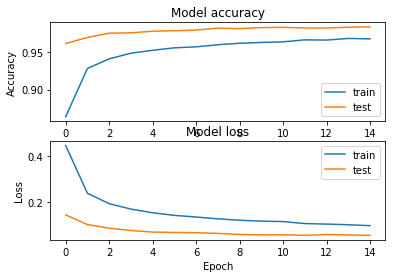

In [91]:
# Visualize training history
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [93]:
history = model.fit(X_train, Y_train,
    batch_size=100, epochs=3, validation_split=0.1, verbose=2) 
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test set: {}".format(scores[1] * 100))


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
 - 22s - loss: 0.0896 - acc: 0.9721 - val_loss: 0.0590 - val_acc: 0.9842
Epoch 2/3
 - 22s - loss: 0.0876 - acc: 0.9731 - val_loss: 0.0562 - val_acc: 0.9853
Epoch 3/3
 - 22s - loss: 0.0882 - acc: 0.9730 - val_loss: 0.0583 - val_acc: 0.9837
Accuracy on test set: 98.11


In [11]:
model.predict(X_test)[0]

array([3.2353406e-13, 1.7383503e-11, 1.5026981e-12, 8.4333188e-08,
       1.1657320e-18, 2.2154897e-14, 8.7543327e-21, 9.9999988e-01,
       1.5147007e-12, 1.6831606e-08], dtype=float32)

## Neural net with NumPy

In [5]:
def tanh_prime(x):
    return 1.0 - np.square(np.tanh(x))

def sigmoid(x, d=None):
    if not d:
        return 1 / (1 + np.exp(-x))
    else:
        return sigmoid(x) * (1 - sigmoid(x))

# alternative activation function
def ReLU(x, d=None):
    if not d:
        return np.maximum(0.0, x)
    else:
        return 1. * (x > 0)

In [70]:
class NNet:
    def __init__(self, activation1=ReLU, activation2=sigmoid):

        self.activation1 = activation1
        self.activation2 = activation2
        
        self.z2, self.a2, self.z3, self.a3 = (None,) * 4
        self.delta2, self.delta3 = (None,) * 2
        self.djdw1, self.djdw2 = (None,) * 2
        self.gradient, self.numericalGradient = (None,) * 2
        
        w1 = np.random.rand(784,800) 
        self.w1 = np.vstack((w1, np.random.rand(1,800))) 
    
        w2 = np.random.rand(800,10)
        self.w2 =  np.vstack((w2, np.random.rand(1,10)))
        
                  
    def forward(self, X):
        self.m = float((X.shape[0]))

        ba = np.ones((X.shape[0], 1))
        self.x = np.concatenate((X, ba), axis=1)
                       
        self.z2 = np.dot(self.x, self.w1)
        self.a2 = self.activation1(self.z2) 

        ba2 = np.ones((self.x.shape[0], 1))
        self.a2 = np.concatenate((self.a2, ba2), axis=1)

        self.z3 = np.dot(self.a2, self.w2)
        self.a3 = self.activation2(self.z3)  
        
        
    def backward(self, Y):
        self.y = Y.copy() 

        self.delta3 = np.multiply(-(self.y - self.a3), \
                                  self.activation2(self.z3, 1))
        
        self.djdw2 = (self.a2.T.dot(self.delta3)) / \
                            self.m + self.Lambda *  self.w2
                                                        #L1 np.sign(self.w2)

        self.delta2 = np.multiply(self.delta3.dot(self.w2.T), \
                                  self.activation1(np.concatenate((self.z2, np.ones((self.z2.shape[0], 1))), axis=1), 1))
        self.djdw1 = (self.x.T.dot(np.delete(self.delta2, 800, axis=1))) / self.m + self.Lambda *  self.w1
                                                                                                    #L1 np.sign(self.w1)
        
    def update_gradient(self, lrate=100):
        self.w1 -= lrate * self.djdw1
        self.w2 -= lrate * self.djdw2

        
    def summary(self, step):
        print( "Iteration: %d, Loss %f" % (step, self.cost_function()))
        print("RMSE: " + str(np.sqrt(np.mean(np.square(self.a3 - self.y)))))
        print("MAE: " + str(np.sum(np.absolute(self.a3 - self.y)) / self.m))    

     
    def cost_function(self):
        return 0.5 * np.sum(np.square((self.y-self.a3))) / self.m + (self.Lambda/2) * (np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)))
                                                        # L1 self.Lambda * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w1)))
        
        
    def train(self, X, Y, iters=1000, lrate=100, Lambda=0.001):
        self.Lambda = Lambda
        for step in range(iters):
            self.forward(X)
            self.backward(Y)
            self.update_gradient(lrate)

            if step % 10 == 0:
                self.summary(step)
    
    def predict(self, X):
        self.forward(X)
        prediction = []
        for i in self.a3:
            pr = []
            for x in i:
                if x >= 0.8:
                    pr.append(1)
                else:
                    pr.append(0)
                
            prediction.append(pr)
        return prediction
        

In [71]:
x_tr = X_train[:100]
y_tr = Y_train[:100]

In [72]:
nn = NNet()
nn.train(x_tr,y_tr,500, 10)

Iteration: 0, Loss 108.204634
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 10, Loss 89.320740
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 20, Loss 73.875471
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 30, Loss 61.242679
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 40, Loss 50.910231
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 50, Loss 42.459250
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 60, Loss 35.547134
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 70, Loss 29.893666
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 80, Loss 25.269656
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 90, Loss 21.487646
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 100, Loss 18.394313
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 110, Loss 15.864255
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 120, Loss 13.794903
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 130, Loss 12.102366
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 140, Loss 10.718028
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 150, Loss 9.585768
RMSE:

In [74]:
nn.train(x_tr,y_tr,5000, 1)

Iteration: 0, Loss 0.215902
RMSE: 0.19879977539652344
MAE: 0.5215087210576642
Iteration: 10, Loss 0.215816
RMSE: 0.19879663882847132
MAE: 0.5220631253778258
Iteration: 20, Loss 0.215729
RMSE: 0.19879311777197717
MAE: 0.5226573587970749
Iteration: 30, Loss 0.215643
RMSE: 0.19878914531547537
MAE: 0.5233013909457739
Iteration: 40, Loss 0.215556
RMSE: 0.1987847336577512
MAE: 0.5239795605399005
Iteration: 50, Loss 0.215469
RMSE: 0.19877966322935242
MAE: 0.524733387415442
Iteration: 60, Loss 0.215381
RMSE: 0.19877390022508953
MAE: 0.5255332439591354
Iteration: 70, Loss 0.215292
RMSE: 0.19876729856187028
MAE: 0.5264048156148804
Iteration: 80, Loss 0.215201
RMSE: 0.198759682219431
MAE: 0.5273518426208881
Iteration: 90, Loss 0.215107
RMSE: 0.19875069615411708
MAE: 0.5283880515986558
Iteration: 100, Loss 0.215011
RMSE: 0.19874010813731469
MAE: 0.5295529124338527
Iteration: 110, Loss 0.214909
RMSE: 0.19872742701153323
MAE: 0.5308353139458333
Iteration: 120, Loss 0.214802
RMSE: 0.1987119949092507


Iteration: 1030, Loss 0.028073
RMSE: 0.029223888591797
MAE: 0.19512463732637553
Iteration: 1040, Loss 0.028060
RMSE: 0.029213587956880206
MAE: 0.19521656907586912
Iteration: 1050, Loss 0.028048
RMSE: 0.029204620734343174
MAE: 0.19530183026915943
Iteration: 1060, Loss 0.028036
RMSE: 0.02919677667352374
MAE: 0.19538974410635263
Iteration: 1070, Loss 0.028025
RMSE: 0.02918975889213959
MAE: 0.19547291799441296
Iteration: 1080, Loss 0.028014
RMSE: 0.029183543518312236
MAE: 0.19556928249027272
Iteration: 1090, Loss 0.028003
RMSE: 0.02917799334313986
MAE: 0.19565878839312562
Iteration: 1100, Loss 0.027993
RMSE: 0.029172940425261702
MAE: 0.19573970824971357
Iteration: 1110, Loss 0.027983
RMSE: 0.02916839033944073
MAE: 0.19583305868800083
Iteration: 1120, Loss 0.027974
RMSE: 0.029164189395063298
MAE: 0.1959230605938832
Iteration: 1130, Loss 0.027965
RMSE: 0.02916049585145942
MAE: 0.19600409004193822
Iteration: 1140, Loss 0.027956
RMSE: 0.029156996490824948
MAE: 0.19608743978640292
Iteration: 11

In [76]:
Y_pr = nn.predict(X_test)

In [80]:
Y_pr[:5], Y_test[:5]

([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

In [8]:
nn = NNet()
nn.train(X_train,Y_train,20, 100)

Iteration: 0, Loss 90.383741
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 10, Loss 14.941458
RMSE: 0.9486832980505138
MAE: 9.0


In [10]:
nn.train(X_train,Y_train,50, 10)

Iteration: 0, Loss 6.036019
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 10, Loss 5.756321
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 20, Loss 5.527554
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 30, Loss 5.340443
RMSE: 0.9486832980505138
MAE: 9.0
Iteration: 40, Loss 5.187404
RMSE: 0.9486832980505138
MAE: 9.0


In [14]:
nn.train(X_train,Y_train,100, 20)

Iteration: 0, Loss 4.663924
RMSE: 0.9486828936359367
MAE: 8.999996496774859
Iteration: 10, Loss 4.609201
RMSE: 0.948670103696047
MAE: 8.999884823209706
Iteration: 20, Loss 3.259583
RMSE: 0.42113273778183513
MAE: 1.7779084297460501
Iteration: 30, Loss 2.472482
RMSE: 0.4213240999692487
MAE: 1.7847787075300388
Iteration: 40, Loss 1.978943
RMSE: 0.42133925838532105
MAE: 1.776024464075981
Iteration: 50, Loss 1.616166
RMSE: 0.4213350674799915
MAE: 1.7795272542602838
Iteration: 60, Loss 1.372648
RMSE: 0.42109013071093937
MAE: 1.830105441031316
Iteration: 70, Loss 1.753654
RMSE: 0.3162275134711301
MAE: 1.0000314805418522
Iteration: 80, Loss 1.336903
RMSE: 0.316219635937028
MAE: 1.0005121452060606
Iteration: 90, Loss 1.294495
RMSE: 0.31622776601682256
MAE: 1.000000000008215


In [18]:
nn.train(X_train,Y_train,100, 5)

Iteration: 0, Loss 0.831219
RMSE: 0.31622775218013266
MAE: 1.000001189074866
Iteration: 10, Loss 0.799624
RMSE: 0.3162277274672914
MAE: 1.0000030278384675
Iteration: 20, Loss 0.771042
RMSE: 0.31622766491181825
MAE: 1.000007331854353
Iteration: 30, Loss 0.745187
RMSE: 0.31622751487109363
MAE: 1.0000169442165527
Iteration: 40, Loss 0.721796
RMSE: 0.3162271720713753
MAE: 1.0000374932963332
Iteration: 50, Loss 0.700634
RMSE: 0.31622642193124856
MAE: 1.0000797010365867
Iteration: 60, Loss 0.681486
RMSE: 0.3162248381970556
MAE: 1.0001634442971135
Iteration: 70, Loss 0.664153
RMSE: 0.3162215742128015
MAE: 1.0003253384954596
Iteration: 80, Loss 0.648452
RMSE: 0.3162148693707178
MAE: 1.0006349993381678
Iteration: 90, Loss 0.634205
RMSE: 0.3162005818970938
MAE: 1.0012385265810488


In [19]:
nn.cost_function()

0.6224614121561942

In [20]:
nn.a3[10]

array([1.45073719e-22, 1.31221416e-37, 9.39743928e-06, 1.50524618e-08,
       1.31732502e-08, 1.68237017e-11, 7.01334270e-24, 1.33064159e-05,
       1.78255350e-06, 1.69464140e-37])

In [22]:
Y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
#nn.forward(X_train[100:200])
y_pr = nn.predict(X_test) 

In [24]:
y_pr[10]

array([8.43343573e-19, 3.30683425e-30, 9.14880020e-05, 4.71513809e-07,
       4.22109282e-07, 1.21067342e-09, 6.28311241e-20, 1.34801432e-04,
       2.40356142e-05, 1.19734562e-29])

In [25]:
Y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [49]:
classification_report(Y_test, y_pr)

ValueError: Mix type of y not allowed, got types {'continuous-multioutput', 'multilabel-indicator'}

In [ ]:
    def set_weights(self, weights):
        x = 784 * 800
        self.w1 = np.reshape(weights[0:x], (784, 800))
        self.w2 = np.reshape(weights[x:x+8000], (800, 10))
        
           
    def check_gradients(self):
        self.compute_gradients()
        self.compute_numerical_gradients()
        print("Gradient checked: " + str(np.linalg.norm(self.gradient - self.numericalGradient) / np.linalg.norm(
            self.gradient + self.numericalGradient)))    

        
    def compute_gradients(self):
        nn.forward()
        nn.backward()
        self.gradient = np.concatenate((self.djdw1.ravel(), self.djdw2.ravel()), axis=1).T

        
    def compute_numerical_gradients(self):
        weights = np.concatenate((self.w1.ravel(), self.w2.ravel()), axis=1).T

        self.numericalGradient = np.zeros(weights.shape)
        perturbation = np.zeros(weights.shape)
        e = 1e-4

        for p in range(len(weights)):
            # Set perturbation vector
            perturbation[p] = e

            self.set_weights(weights + perturbation)
            self.forward()
            loss2 = self.cost_function()

            self.set_weights(weights - perturbation)
            self.forward()
            loss1 = self.cost_function()

            self.numericalGradient[p] = (loss2 - loss1) / (2 * e)

            perturbation[p] = 0

        self.set_weights(weights)        